<a href="https://colab.research.google.com/github/jedeegan/jedeegan/blob/main/Meta_AI_SAM_Interior_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/facebookresearch/segment-anything
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pt
%cd segment-anything
!git clone https://github.com/roboflow/supervision

Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.30 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (155/155), done.
--2024-01-19 00:37:32--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-01-19 00:37:32 ERROR 403: Forbidden.

/content/segment-anything/segment-anything
Cloning into 'supervision'...
remote: Enumerating objects: 8650, done.
remote: Counting objects: 100% (3721/3721), done.
remote: Compressing objects: 100% (991/991), done.
remote: Total 8650 (delta 3021), reused 3194 (delta 2686), pack-reused 4929
Receiving objects: 100% (8650/8650), 43.20 MiB | 21.87 MiB/s, done.
Res

In [ ]:
import torch
import torchvision
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import supervision as sv
import zipfile

In [ ]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80


In [ ]:
import supervision as sv

In [ ]:
import zipfile

In [ ]:
local_zip = '/content/Interior.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Interior')
zip_ref.close()

In [ ]:
import os

In [ ]:
# Directory with Interior
int_dir = os.path.join('Interior/Interior')
IMAGE_PATH = os.listdir(int_dir)
temp=[]
for i in IMAGE_PATH:
  test=int_dir+"/"+i
  temp.append(test)

temp
#!mkdir images
#!wget -O images/image.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGY56nx1rzKFmlwvuCA1m0buj22-kaBsiYsw&usqp=CAU

['Interior/Interior/Minimalist-interior-design-Tips-to-make-your-home-look-minimal.jpg',
 'Interior/Interior/GettyImages-1161177015-f1de4ba58a6c4f50969d9119d80405a6.jpg',
 'Interior/Interior/INTERIOR-DECORATOR.jpg',
 'Interior/Interior/Best-Interior-Design-Ideas-Upcoming-Trending-Interior-Design-for-2023.jpg',
 'Interior/Interior/Arch2O-what-you-need-to-know-before-becoming-an-interior-designer-2.jpg',
 'Interior/Interior/photo-1615529182904-14819c35db37.jpg',
 'Interior/Interior/living-room-by-interior-designers-1-1040x675.jpg',
 'Interior/Interior/home-renovation-singapore-interior-design-tips-900x643.png']

In [ ]:
import cv2

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

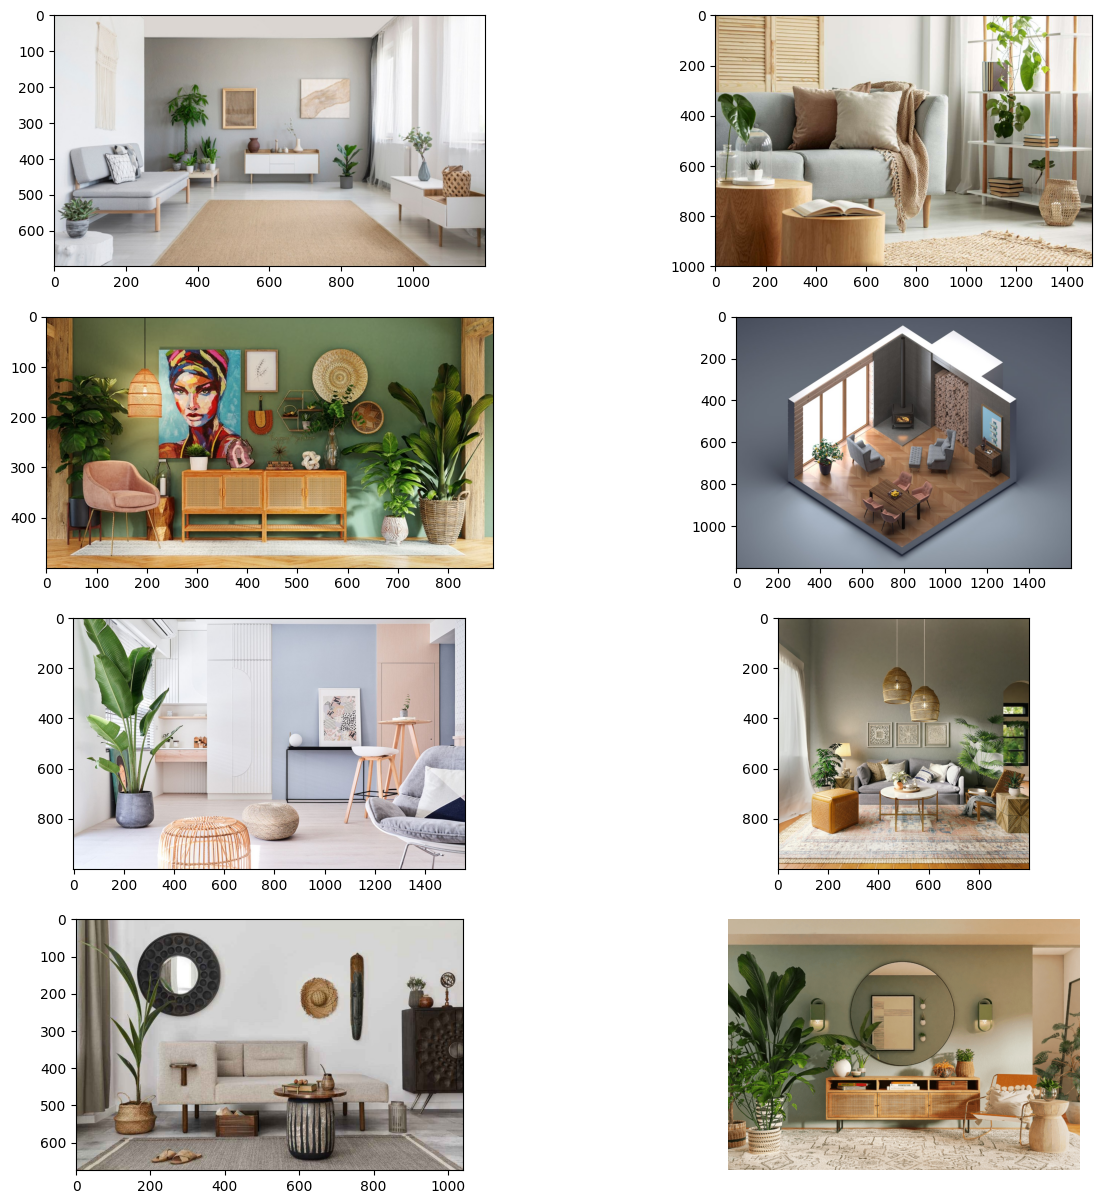

In [ ]:
image_path=[]
for i in temp:
  img_path = cv2.imread(i)
  img_path = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
  image_path.append(img_path)
  #print(image_path)


plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(8):
    plt.subplot(4,2,i+1)    # the number of images in the grid is 2*4 (8)
    plt.imshow(image_path[i])
plt.axis('off')
plt.show()

In [ ]:
pip install segment-anything

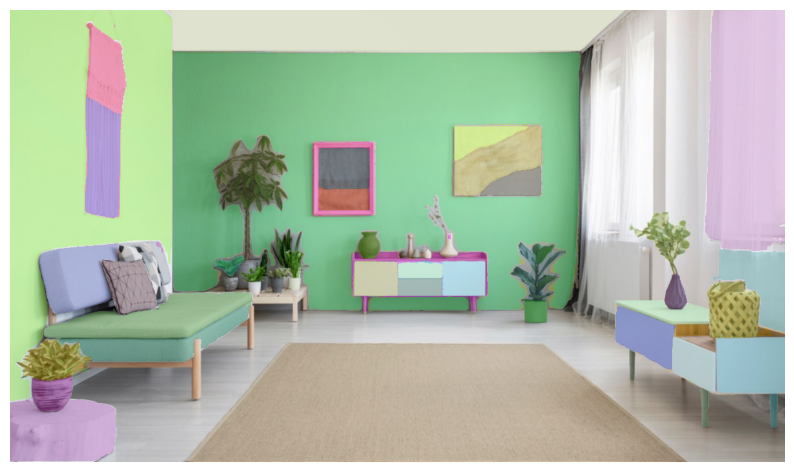

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/content/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image_path[0])

plt.figure(figsize=(10,10))
plt.imshow(image_path[0])
show_anns(masks)
plt.axis('off')
plt.show()

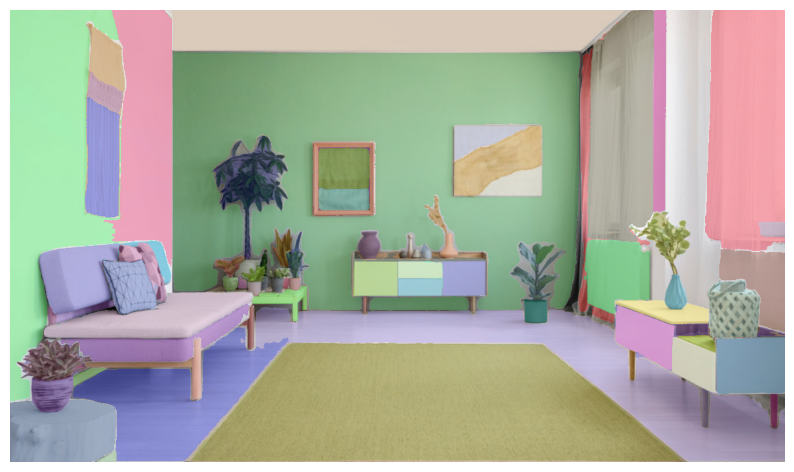

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
model=sam,
points_per_side=32,
pred_iou_thresh=0.86,
stability_score_thresh=0.92,
crop_n_layers=1,
crop_n_points_downscale_factor=2,
min_mask_region_area=100, # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image_path[0])
plt.figure(figsize=(10,10))
plt.imshow(image_path[0])
show_anns(masks2)
plt.axis('off')
plt.show()

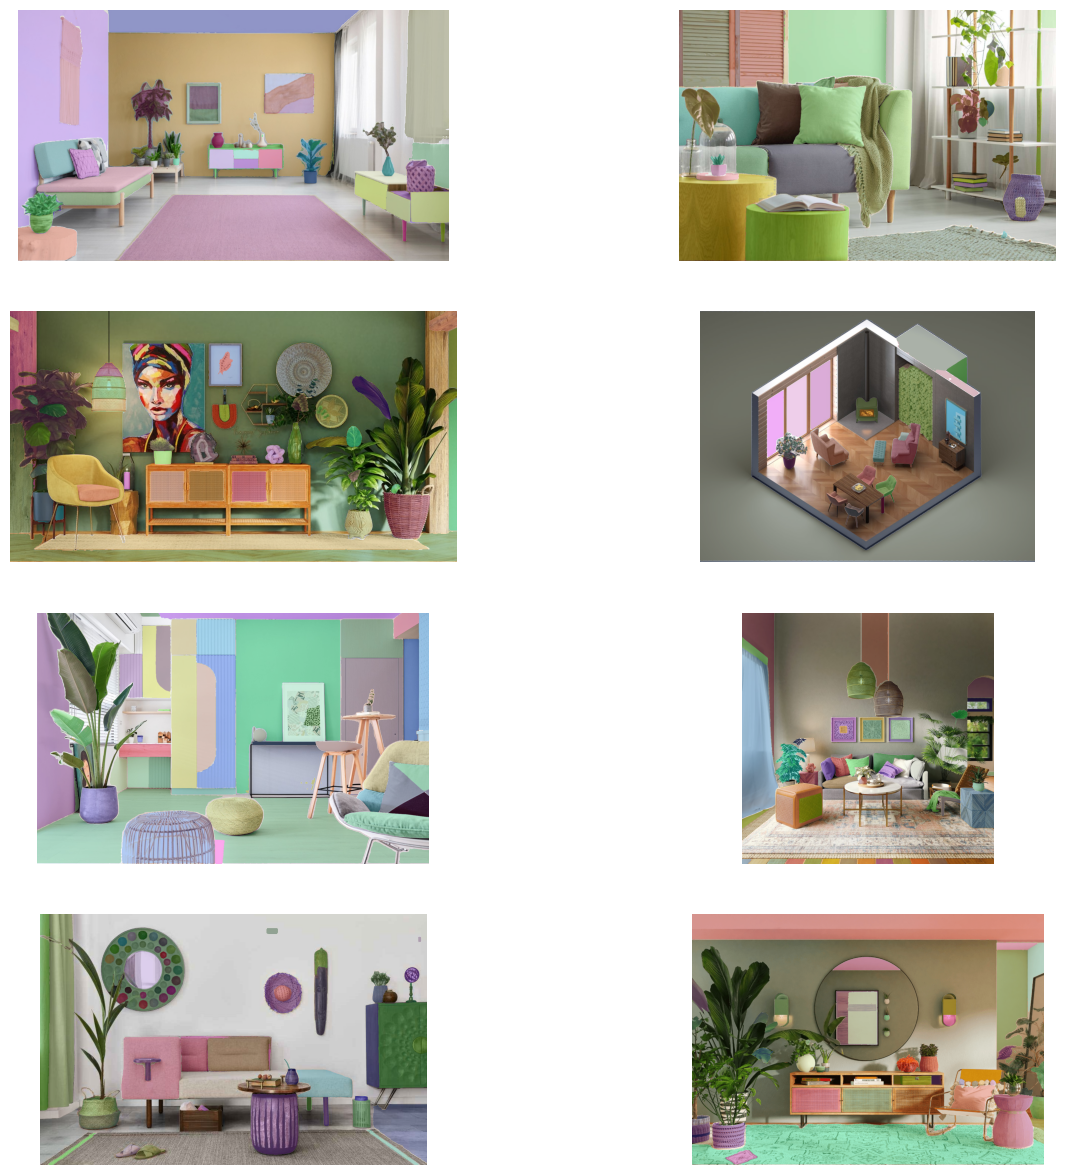

In [ ]:
masks_list=[]
for i in range(8):
  mask_lt = mask_generator.generate(image_path[i])
  masks_list.append(mask_lt)
  #print(masks_list)
len(masks_list)


plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(8):
    plt.subplot(4,2,i+1)    # the number of images in the grid is 2*4 (8)
    plt.imshow(image_path[i])
    show_anns(masks_list[i])
    plt.axis('off')
plt.show()